### 파이썬 머신러닝
## 비지도 학습과 데이터 전처리
---
# PCA를 이용한 이미지 변환

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 로딩
- ~\scikit_learn_data\lfw_home

In [3]:
from sklearn.datasets import fetch_lfw_people

In [4]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [5]:
dir(people)

['DESCR', 'data', 'images', 'target', 'target_names']

> 앞부분 10명의 사진을 subplot 으로 출력해 보자

In [4]:
dir(people)

['DESCR', 'data', 'images', 'target', 'target_names']

In [6]:
people.target_names

array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
       'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
       'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
       'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
       'George Robertson', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
       'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
       'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
       'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
       'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
       'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
       'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
       'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
       'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
       'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer', 'Pete Sampras',
       'Rece

In [6]:
people.target.shape

(3023,)

In [7]:
np.bincount(people.target)

array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
        22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
        21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
        41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
        23,  52,  33,  23,  25,  33, 144,  32,  49,  24], dtype=int64)

In [8]:
for i in range(people.target_names.shape[0]):
    print('%02d %-30s %3d' % (i, people.target_names[i],
                              len(people.target[people.target==i])))

00 Alejandro Toledo                39
01 Alvaro Uribe                    35
02 Amelie Mauresmo                 21
03 Andre Agassi                    36
04 Angelina Jolie                  20
05 Ariel Sharon                    77
06 Arnold Schwarzenegger           42
07 Atal Bihari Vajpayee            24
08 Bill Clinton                    29
09 Carlos Menem                    21
10 Colin Powell                   236
11 David Beckham                   31
12 Donald Rumsfeld                121
13 George Robertson                22
14 George W Bush                  530
15 Gerhard Schroeder              109
16 Gloria Macapagal Arroyo         44
17 Gray Davis                      26
18 Guillermo Coria                 30
19 Hamid Karzai                    22
20 Hans Blix                       39
21 Hugo Chavez                     71
22 Igor Ivanov                     20
23 Jack Straw                      28
24 Jacques Chirac                  52
25 Jean Chretien                   55
26 Jennifer 

In [18]:
for i, (name, count) in enumerate(zip(people.target_names, np.bincount(people.target))):
    print('%02d %-30s %3d' % (i, name, count))

00 Alejandro Toledo                39
01 Alvaro Uribe                    35
02 Amelie Mauresmo                 21
03 Andre Agassi                    36
04 Angelina Jolie                  20
05 Ariel Sharon                    77
06 Arnold Schwarzenegger           42
07 Atal Bihari Vajpayee            24
08 Bill Clinton                    29
09 Carlos Menem                    21
10 Colin Powell                   236
11 David Beckham                   31
12 Donald Rumsfeld                121
13 George Robertson                22
14 George W Bush                  530
15 Gerhard Schroeder              109
16 Gloria Macapagal Arroyo         44
17 Gray Davis                      26
18 Guillermo Coria                 30
19 Hamid Karzai                    22
20 Hans Blix                       39
21 Hugo Chavez                     71
22 Igor Ivanov                     20
23 Jack Straw                      28
24 Jacques Chirac                  52
25 Jean Chretien                   55
26 Jennifer 

In [10]:
people.data.shape, people.images.shape

((3023, 5655), (3023, 87, 65))

In [62]:
np.where(people.target==50)

(array([  70,  185,  244,  323,  393,  399,  536,  690,  864, 1196, 1373,
        1404, 1470, 1479, 1630, 1683, 1698, 1703, 2014, 2021, 2137, 2191,
        2390, 2438, 2466, 2511, 2664, 2687, 2740, 2873, 2962, 2992],
       dtype=int64),)

In [10]:
people.data.max(), people.data.min()

(255.0, 0.0)

Text(0.5,1,'Winona Ryder(61)')

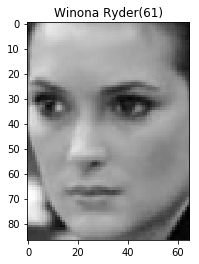

In [11]:
plt.imshow(people.images[0], cmap='gray')
plt.title('%s(%d)' % (people.target_names[people.target[0]], people.target[0]))

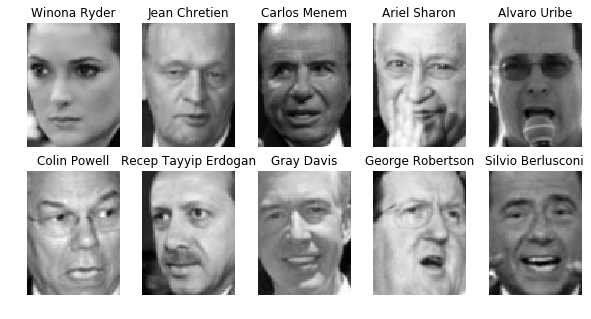

In [16]:
fig = plt.figure(figsize=[10,5])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(people.images[i], cmap='gray')
    plt.title(people.target_names[people.target[i]])
    plt.axis('off')

- 사람당 이미지 갯수를 최대 50개로 제한

In [6]:
mask = np.zeros(len(people.target), dtype=bool)
mask.shape

(3023,)

In [7]:
for i in np.unique(people.target):
    mask[np.where(people.target==i)[0][:50]] = True
    
mask

array([ True,  True,  True, ..., False, False, False])

In [8]:
X_people = people.data[mask] # 255 로 나누는 것 고려
y_people = people.target[mask]

X_people.shape, y_people.shape

((2063, 5655), (2063,))

In [32]:
np.bincount(mask)

array([ 960, 2063], dtype=int64)

### PCA 적용

In [25]:
people.data.shape

(3023, 5655)

In [9]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(1000)
pca.fit(X_people) # 새로운 축 100개를 찾음 (주성분 100개)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
X_pca = pca.transform(X_people)
X_pca.shape

(2063, 1000)

In [53]:
pca.components_[0]

array([-0.00345426, -0.00399989, -0.00453244, ..., -0.00487933,
       -0.0043424 , -0.00354144], dtype=float32)

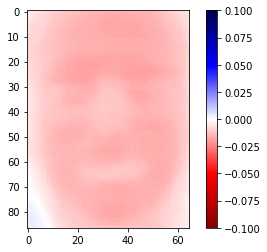

In [54]:
plt.imshow(pca.components_[0].reshape(87,65), cmap='seismic_r', vmin=-0.1, vmax=0.1)
plt.colorbar()

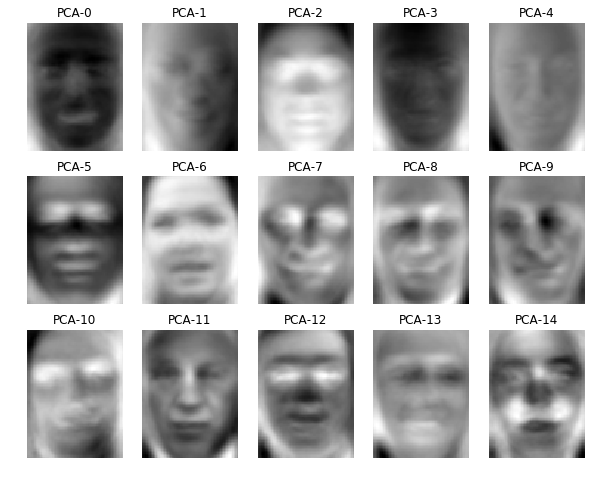

In [55]:
fig = plt.figure(figsize=[10,8])

for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(pca.components_[i].reshape(87,65), cmap='gray')
    plt.axis('off')
    plt.title('PCA-%d' % i)

### 얼굴 재구성

In [56]:
pca.components_.shape

(1000, 5655)

In [57]:
X_recover = X_pca @ pca.components_

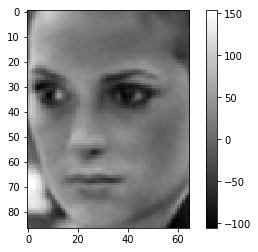

In [58]:
plt.imshow(X_recover[0].reshape(87,65), cmap='gray')
plt.colorbar()

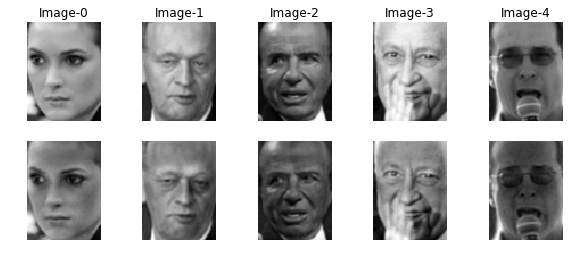

In [59]:
fig = plt.figure(figsize=[10,4])

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X_people[i].reshape(87,65), cmap='gray')
    plt.axis('off')
    plt.title('Image-%d' % i)
    plt.subplot(2,5,i+6)
    plt.imshow(X_recover[i].reshape(87,65), cmap='gray')
    plt.axis('off')

In [61]:
pca = PCA(500)
pca.fit(X_people)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
pca.components_.shape

(500, 5655)

In [63]:
X_pca = pca.transform(X_people)
X_pca.shape

(2063, 500)

In [67]:
pca.components_[:10].shape

(10, 5655)

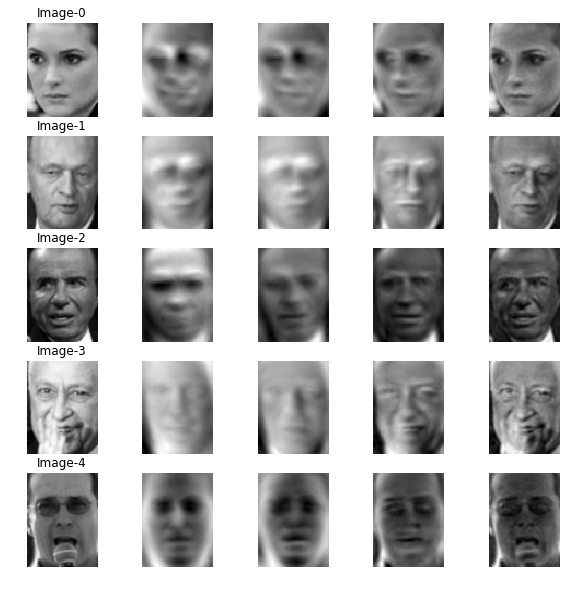

In [66]:
fig = plt.figure(figsize=[10,10])

for i in range(5):
    plt.subplot(5,5,i*5+1)
    plt.imshow(X_people[i].reshape(87,65), cmap='gray')
    plt.axis('off')
    plt.title('Image-%d' % i)
    
    plt.subplot(5,5,i*5+2)
    plt.imshow((X_pca[i,:10] @ pca.components_[:10]).reshape(87,65), cmap='gray')
    plt.axis('off')
    
    plt.subplot(5,5,i*5+3)
    plt.imshow((X_pca[i,:20] @ pca.components_[:20]).reshape(87,65), cmap='gray')
    plt.axis('off')
    
    plt.subplot(5,5,i*5+4)
    plt.imshow((X_pca[i,:100] @ pca.components_[:100]).reshape(87,65), cmap='gray')
    plt.axis('off')
    
    plt.subplot(5,5,i*5+5)
    plt.imshow((X_pca[i,:500] @ pca.components_[:500]).reshape(87,65), cmap='gray')
    plt.axis('off')

### 연습문제
- X_people, y_people 사용 (학습/테스트셋 분리하지 않음)
- 주성분 100개만 사용하여 로지스틱회귀를 적용한 점수를 구하시오<br>
- PCA 를 적용하지 않은 원본 데이터 결과와 비교를 하시오.

In [67]:
X_people.shape, y_people.shape

((2063, 5655), (2063,))

In [23]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression()
model.fit(X_people, y_people)
model.score(X_people, y_people)

KeyboardInterrupt: 

In [21]:
pca = PCA(100)
X_pca = pca.fit_transform(X_people)

In [22]:
model = LogisticRegression()
model.fit(X_pca, y_people)
model.score(X_pca, y_people)

NameError: name 'LogisticRegression' is not defined

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people)

In [14]:
pca = PCA(200)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [78]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.4418604651162791

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(15)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.22093023255813954

### 특정 주성분에 특화된 얼굴 찾기

In [35]:
idx = np.argsort(X_pca[:,9])[-1:-11:-1]
idx

array([1162,   24, 1553, 1496, 2012,  502,  252, 1879,  399,  890],
      dtype=int64)

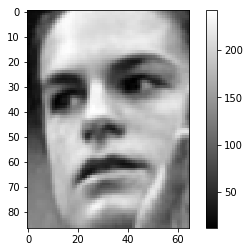

In [37]:
plt.imshow(X_people[1162].reshape(87,65), cmap='gray')
plt.colorbar()

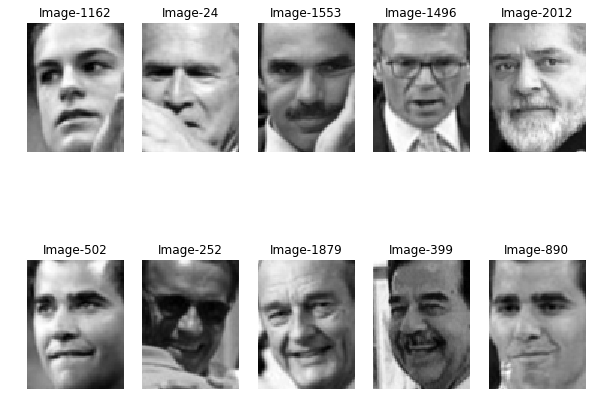

In [38]:
fig = plt.figure(figsize=[10,8])

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_people[idx[i]].reshape(87,65), cmap='gray')
    plt.axis('off')
    plt.title('Image-%d' % idx[i])

In [86]:
idx = np.argsort(X_pca[:,1])[:10]
idx

array([  34, 2061,   11,  167, 1807,  875, 1990,  646,  580,  784],
      dtype=int64)

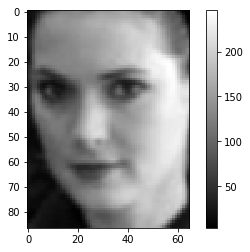

In [88]:
plt.imshow(X_people[34].reshape(87,65), cmap='gray')
plt.colorbar()

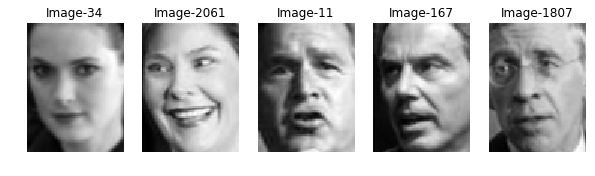

In [89]:
fig = plt.figure(figsize=[10,4])

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_people[idx[i]].reshape(87,65), cmap='gray')
    plt.axis('off')
    plt.title('Image-%d' % idx[i])

### 연습문제
- 여성사진 100장과 남성사진 100장을 뽑아내어 남/녀를 분류하시오.

In [40]:
X_people.shape, y_people.shape

((2063, 5655), (2063,))

In [68]:
np.where(y_people==44)[0][:20]

array([ 398,  472,  515,  623,  637,  721,  739,  916, 1028, 1188, 1302,
       1362, 1381, 1394, 1414, 1456, 1581, 1614, 1659, 1766], dtype=int64)

In [71]:
woman_index = []

for i in [4,26,28,37,44]:
    woman_index += list(np.where(y_people==i)[0][:20])
    
len(woman_index)

100

In [72]:
man_index = []

for i in [0,1,2,5,6]:
    man_index += list(np.where(y_people==i)[0][:20])
    
len(man_index)

100

In [73]:
indexes = woman_index + man_index
len(indexes)

200

In [76]:
X = X_people[indexes]
y = np.array([0]*100 + [1]*100) # 0~99: woman, 100~199: man

X.shape, y.shape

((200, 5655), (200,))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((150, 5655), (50, 5655))

In [89]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.72

In [90]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.88

In [91]:
pred_y = model.predict(X_test)
np.where(pred_y!=y_test)

(array([ 6, 20, 22, 23, 43, 46], dtype=int64),)

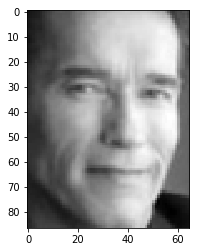

In [97]:
plt.imshow(X_test[46].reshape(87,65), cmap='gray')

- 여성 1명, 남성 1명의 사진을 골라 분류하시오.

In [99]:
mrbush = X_people[y_people==14][:41]
msbush = X_people[y_people==37]

mrbush.shape, msbush.shape

((41, 5655), (41, 5655))

In [127]:
X = np.r_[mrbush, msbush]
X.shape

(82, 5655)

In [144]:
y = np.array([1]*41+[0]*41)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape

((61, 5655), (21, 5655))

In [146]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [147]:
model.coef_

array([[ 7.69112962e-05,  1.57444059e-04,  2.95774678e-04, ...,
        -2.75651139e-05, -2.96865284e-04, -5.68673529e-04]])

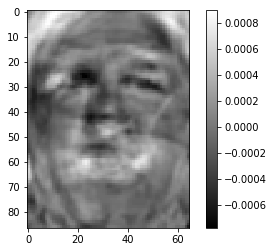

In [148]:
plt.imshow(model.coef_.reshape(87,65), cmap='gray')
plt.colorbar()

In [91]:
pred_y = model.predict(X_test)
np.where(pred_y!=y_test)

(array([ 6, 20, 22, 23, 43, 46], dtype=int64),)

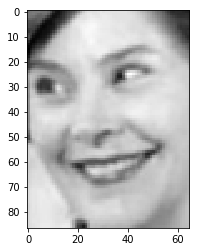

In [112]:
plt.imshow(X[42].reshape(87,65), cmap='gray')

### k-means 적용
- 중심점을 그림으로 그려본다

In [113]:
from sklearn.cluster import KMeans

In [124]:
k=5
kmeans = KMeans(k)
kmeans.fit(X_people)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [116]:
kmeans.cluster_centers_

array([[ 82.41486 ,  85.15652 ,  88.67459 , ..., 116.85932 , 112.67379 ,
        108.38889 ],
       [ 72.541626,  73.63509 ,  75.67692 , ..., 104.33805 , 101.903755,
        100.10887 ]], dtype=float32)

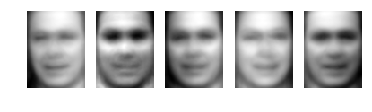

In [126]:
for i in range(k):
    plt.subplot(1,k,i+1)
    plt.imshow(kmeans.cluster_centers_[i].reshape(87,65), cmap='gray')
    plt.axis('off')